# Diabetes Detection

The goal of this project is to create a model in which we can use certain biological measurements to diagnostically predict whether or not a patient has diabetes.

Our goal is also to identify the biological factors that most indicate a positive diagnosis of diabetes.

## Data Importation

### Import Libraries

We will first import the libraries we will be using in this project.

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#remove scikitlearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Import Dataset

Next, we will import the dataset we will be using for this project.

The dataset we will use for this project is the "Pima Indians Diabetes Database" from Kaggle. The dataset is a selection with constraints from the National Institute of Diabetes and Digestive and Kidney Diseases. All of the patients are female, they are at least 21 years old, and are of Pima Indian heritage.

In [3]:
raw_data = pd.read_csv('diabetes.csv')

In [4]:
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
raw_data.shape[0]

768

In [6]:
raw_data.shape[1]

9

The dataset contains 768 women and 9 attributes, including the number of pregnancies the woman has had, her glucose level, her blood pressure, her skin thickness, her insulin level, her body mass index, the Diabetes Pedigree Function, her age, and whether or not she was diagnosed with diabetes.

The Diabetes Pedigree Function is a synthesis of information about a person's family history with diabetes.

#### Descriptive Statistics

We will now look at some descriptive statistics of the 9 attributes in the dataset, including their mean, standard deviation, and probability distributions.

In [7]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

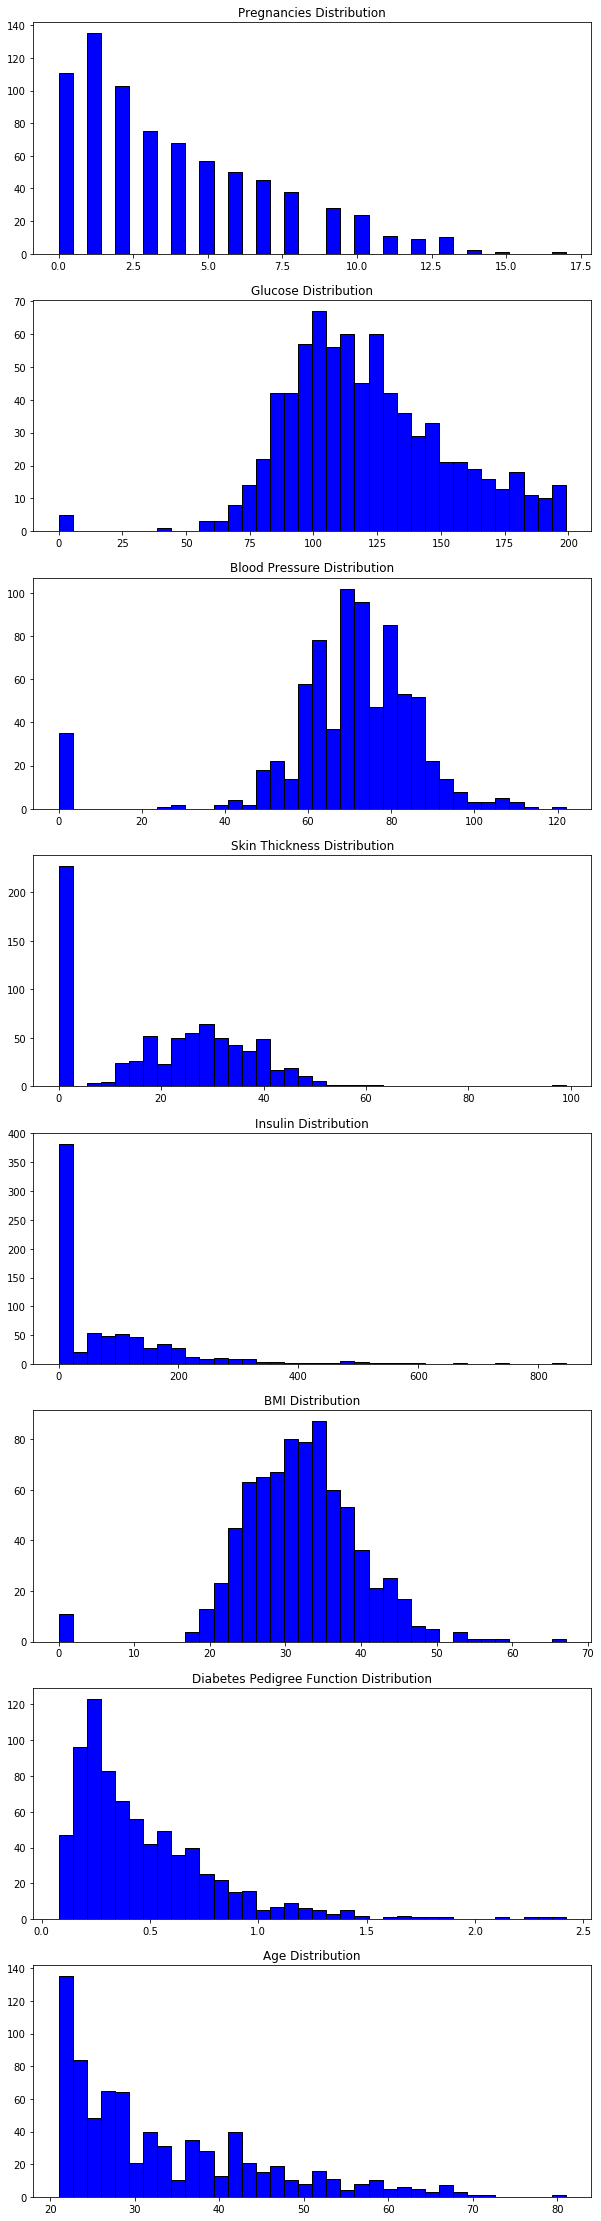

In [8]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, sharey=False, figsize=(10,40))
ax1.hist(raw_data['Pregnancies'], color='blue', edgecolor = 'black', bins = int(180/5))
ax1.set_title('Pregnancies Distribution')
ax2.hist(raw_data['Glucose'], color='blue', edgecolor = 'black', bins = int(180/5))
ax2.set_title('Glucose Distribution')
ax3.hist(raw_data['BloodPressure'], color='blue', edgecolor = 'black', bins = int(180/5))
ax3.set_title('Blood Pressure Distribution')
ax4.hist(raw_data['SkinThickness'], color='blue', edgecolor = 'black', bins = int(180/5))
ax4.set_title('Skin Thickness Distribution')
ax5.hist(raw_data['Insulin'], color='blue', edgecolor = 'black', bins = int(180/5))
ax5.set_title('Insulin Distribution')
ax6.hist(raw_data['BMI'], color='blue', edgecolor = 'black', bins = int(180/5))
ax6.set_title('BMI Distribution')
ax7.hist(raw_data['DiabetesPedigreeFunction'], color='blue', edgecolor = 'black', bins = int(180/5))
ax7.set_title('Diabetes Pedigree Function Distribution')
ax8.hist(raw_data['Age'], color='blue', edgecolor = 'black', bins = int(180/5))
ax8.set_title('Age Distribution')

From the probability distributions of the features above, we can start to see that certain features, like Glucose, Blood Pressure, Skin Thickness, and BMI are normally distributed.

We can also see that other features, like Pregnancies, Insulin, the Diabetes Pedigree Function, and Age are skewed to the right.

Moreover, we can already start to see the presence of some outliers in certain features, as well as some stastics that do not seem to make any sense. We will address this shortly.

## Data Preprocessing

We will now begin our data preprocessing phase. 

### Missing Data

The first thing we will look for is missing data.

In [9]:
raw_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

A quick search of N/A data shows us that there is no data missing. However, as we can see from the probability distributions above, this statistic is misleading. Just because there is no presence of data that is N/A, does not mean there is no missing data. In fact, a measurement of "0" in certain attributes does not make sense and could indicate missing or wrong data.

We will check now for measurements of "0" in attributes where it does not seem to make sense.

In [10]:
(raw_data['Glucose'] == 0).sum()

5

In [11]:
(raw_data['BloodPressure'] == 0).sum()

35

In [12]:
(raw_data['SkinThickness'] == 0).sum()

227

In [13]:
(raw_data['Insulin'] == 0).sum()

374

In [14]:
(raw_data['BMI'] == 0).sum()

11

In [15]:
(raw_data['DiabetesPedigreeFunction'] == 0).sum()

0

In [16]:
(raw_data['Age'] == 0).sum()

0

Our results show us that there are no measurements of "0" in the Diabetes Pedigree Function and Age. However, there are zeros in Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI.

Insulin can have a measurement of zero, but it doesn't make sense for the other four attributes to have a measurement of zero. To correct this, we will impute a measurement of zero in Glucose, Blood Pressure, Skin Thickness, and BMI with the mean of those attributes below.

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']])
raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = imputer.transform(raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']])
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1


### Outliers

Now that all of our missing data is corrected, we will check for outliers.

In [18]:
no_missing_data = raw_data.copy()

In [19]:
no_missing_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A quick look at the descriptive statistics again shows us that the maximum value for Skin Thickness is 99 while the mean is 29 and the standard deviation is 8.8. This is a good indication of an outlier. We can also confirm this from the probability distribution, so we will remove it.

#### Remove SkinThickness Outlier

In [20]:
no_missing_data = no_missing_data.drop(no_missing_data[no_missing_data['SkinThickness'] == 99].index)

In [21]:
no_missing_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.00000,767.000000,767.000000,767.000000
mean,3.847458,121.588571,72.408320,29.062355,79.903520,32.45454,0.471742,33.203390,0.348110
std,3.371117,30.333840,12.103927,8.426410,115.283105,6.87916,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,0.000000,27.50000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405184,29.153420,32.000000,32.40000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.60000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.10000,2.420000,81.000000,1.000000


#### Remove Outcome of 2

There seems to be an instance in the dataset of the outcome, or target, being "2". This is a binary feature and we should remove it.

In [22]:
no_missing_data = no_missing_data.drop(no_missing_data[no_missing_data['Outcome'] == 2].index)

In [23]:
no_missing_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.00000,767.000000,767.000000,767.000000
mean,3.847458,121.588571,72.408320,29.062355,79.903520,32.45454,0.471742,33.203390,0.348110
std,3.371117,30.333840,12.103927,8.426410,115.283105,6.87916,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,0.000000,27.50000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405184,29.153420,32.000000,32.40000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.60000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.10000,2.420000,81.000000,1.000000


The dataset now contains no missing values and outliers have been corrected.

### Feature Scaling

We will now standardize all of our features.

In [24]:
no_outliers = no_missing_data.copy()

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
no_outliers = pd.DataFrame(sc.fit_transform(no_outliers.iloc[:,0:8]))

In [26]:
no_outliers['Outcome'] = no_missing_data['Outcome']
no_outliers.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [27]:
no_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638942,0.871260,-0.033757,0.705107,-0.693559,0.166620,0.468622,1.433863,1.0
1,-0.845214,-1.206984,-0.529787,-0.007405,-0.693559,-0.851610,-0.364440,-0.188095,0.0
2,1.232604,2.025840,-0.695130,0.010814,-0.693559,-1.331633,0.604448,-0.102729,1.0
3,-0.845214,-1.075032,-0.529787,-0.719916,0.122357,-0.633418,-0.919815,-1.041757,0.0
4,-1.142045,0.508392,-2.679252,0.705107,0.764674,1.548504,5.482089,-0.017363,1.0
...,...,...,...,...,...,...,...,...,...
762,1.826266,-0.679176,0.296930,2.248882,0.868833,0.064797,-0.907742,2.543624,0.0
763,-0.548383,0.013572,-0.199100,-0.244909,-0.693559,0.632097,-0.397642,-0.529560,0.0
764,0.342110,-0.019416,-0.033757,-0.719916,0.278596,-0.909794,-0.684385,-0.273461,0.0
765,-0.845214,0.145524,-1.025817,0.010814,-0.693559,-0.342495,-0.370477,1.177765,0.0


### Encode Data

We will now encode our "Outcome" variable.

In [28]:
scaled_data = no_outliers.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaled_data['Outcome'] = le.fit_transform(scaled_data['Outcome'])

In [30]:
scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638942,0.871260,-0.033757,0.705107,-0.693559,0.166620,0.468622,1.433863,1
1,-0.845214,-1.206984,-0.529787,-0.007405,-0.693559,-0.851610,-0.364440,-0.188095,0
2,1.232604,2.025840,-0.695130,0.010814,-0.693559,-1.331633,0.604448,-0.102729,1
3,-0.845214,-1.075032,-0.529787,-0.719916,0.122357,-0.633418,-0.919815,-1.041757,0
4,-1.142045,0.508392,-2.679252,0.705107,0.764674,1.548504,5.482089,-0.017363,1
...,...,...,...,...,...,...,...,...,...
762,1.826266,-0.679176,0.296930,2.248882,0.868833,0.064797,-0.907742,2.543624,0
763,-0.548383,0.013572,-0.199100,-0.244909,-0.693559,0.632097,-0.397642,-0.529560,0
764,0.342110,-0.019416,-0.033757,-0.719916,0.278596,-0.909794,-0.684385,-0.273461,0
765,-0.845214,0.145524,-1.025817,0.010814,-0.693559,-0.342495,-0.370477,1.177765,0


With this being done, we now have a clean and preprocessed dataset, which we can see below.

In [31]:
clean_data = scaled_data.copy()

In [32]:
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638942,0.871260,-0.033757,0.705107,-0.693559,0.166620,0.468622,1.433863,1
1,-0.845214,-1.206984,-0.529787,-0.007405,-0.693559,-0.851610,-0.364440,-0.188095,0
2,1.232604,2.025840,-0.695130,0.010814,-0.693559,-1.331633,0.604448,-0.102729,1
3,-0.845214,-1.075032,-0.529787,-0.719916,0.122357,-0.633418,-0.919815,-1.041757,0
4,-1.142045,0.508392,-2.679252,0.705107,0.764674,1.548504,5.482089,-0.017363,1
...,...,...,...,...,...,...,...,...,...
762,1.826266,-0.679176,0.296930,2.248882,0.868833,0.064797,-0.907742,2.543624,0
763,-0.548383,0.013572,-0.199100,-0.244909,-0.693559,0.632097,-0.397642,-0.529560,0
764,0.342110,-0.019416,-0.033757,-0.719916,0.278596,-0.909794,-0.684385,-0.273461,0
765,-0.845214,0.145524,-1.025817,0.010814,-0.693559,-0.342495,-0.370477,1.177765,0


## Machine Learning

We will now run our dataset through a few different machine learning algorithms to see how well the algorithms can initially classify our data.

### Split Dataset

First, we need to split our dataset into features and targets. Our features are Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, the Diabetes Pedigree Function, and Age. Our target is the Outcome, or whether or not the person was diagnosed with diabetes.

In [33]:
features = clean_data.iloc[:,0:8]
targets = pd.DataFrame(clean_data.iloc[:,8])

Furthermore, we need to split our dataset into a training dataset and a testing dataset. We will do this with an 80/20 split.

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=.2, random_state=0)

### Logistic Regression

The first machine learning algorithm we will use is Logistic Regression. We will first build our model and then fit it to our training data. We will then use the model on our testing data.

#### Build Model

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train, np.array(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Test Model

In [36]:
log_predictions = log_reg.predict(x_test)

#### Results

We will now evaluate the results of our Logistic Regression model by looking at its confusion matrix and calculating the model's accuracy.

##### Confusion Matrix

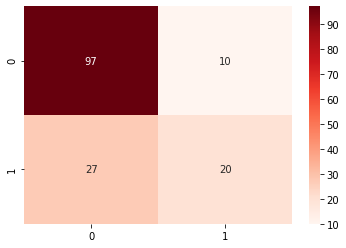

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [38]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

log_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
log_accuracy

75.97402597402598

##### Interpretation

Our Logistic Regression confusion matrix shows that our model predicted 97/107 negative diagnoses correctly and 27/47 positive diagnoses correctly. This results in a ~91% negative dianosis accuracy and only a ~57% positive diagnosis accuracy. In other words, our model is very good at using these features to predict the absence of diabetes in the patient, but not very good at using these features to predict the presence of diabetes in the patient. Overall, the model only scores a ~76% accuracy, which is is not a great score.

We will now try some other algorithms and compare them.

### Support Vector Machines

The second machine learning algorithm we will use is Support Vector Machines. We will carry it out in the same way as we did with our Logistic Regression.

#### Build Model

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Test Model

In [40]:
svm_predictions = svm.predict(x_test)

#### Results

##### Confusion Matrix

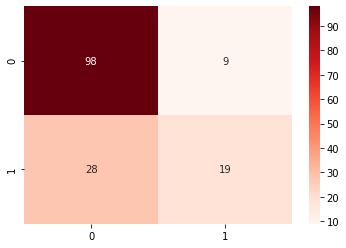

In [41]:
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [42]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

svm_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
svm_accuracy

75.97402597402598

##### Interpretation

Our results for our SVM model were almost exactly the same as with our Logistic Regression model. We achieved a ~92% negative accuracy and a ~60% positive accuracy. These accuracies are better than the Logistic Regression model, but the overall accuracy is still the same at ~76%.

### Naive Bayes Classifier

The third machine learning algorithm we will use is a Naive Bayes Classifier. Just like Logistic Regression and SVM, we will build the model and then test it on our testing data.

#### Build Model

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Test Model

In [44]:
nb_predictions = nb.predict(x_test)

#### Results

##### Confusion Matrix

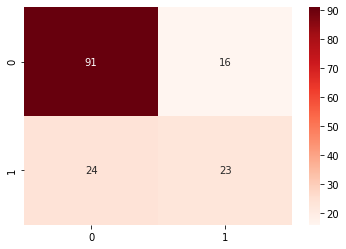

In [45]:
cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [46]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

nb_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
nb_accuracy

74.02597402597402

##### Interpretation

Our Naive Bayes Classifier achieved only an ~85% negative accuracy and only a ~51% positive accuracy, with an overall accuracy of ~74%. These results are slighlty worse than our Logistic Regression and SVM models. 

With three machine learning algorithms showing us poor and similar accuracies, we can conclude that our data, as is, is not a good fit for a classification algorithm. Moreover, we can conclude that the features we have in the dataset, by themselves, do not seem to be good indicators for diabetes in a patient. That being said, we can delve into the dataset and perform some feature engineering in order to produce some better indicators of diabetes in a patient.

## Feature Engineering

### Correlation Matrix

We will begin our feature engineering by looking at the correlation matrix of our dataset.

In [47]:
engineering_data = no_missing_data.copy()

In [48]:
corr = engineering_data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130227,0.208426,0.092583,-0.074067,0.021804,-0.033309,0.548341,0.223189
Glucose,0.130227,1.000000,0.219896,0.175380,0.334762,0.230828,0.136610,0.260693,0.491080
BloodPressure,0.208426,0.219896,1.000000,0.203447,-0.047024,0.281379,-0.002683,0.326515,0.166635
SkinThickness,0.092583,0.175380,0.203447,1.000000,0.125475,0.562739,0.102039,0.107432,0.210235
Insulin,-0.074067,0.334762,-0.047024,0.125475,1.000000,0.185134,0.185422,-0.040122,0.131984
BMI,0.021804,0.230828,0.281379,0.562739,0.185134,1.000000,0.153288,0.024576,0.311744
DiabetesPedigreeFunction,-0.033309,0.136610,-0.002683,0.102039,0.185422,0.153288,1.000000,0.032698,0.173512
Age,0.548341,0.260693,0.326515,0.107432,-0.040122,0.024576,0.032698,1.000000,0.235203
Outcome,0.223189,0.491080,0.166635,0.210235,0.131984,0.311744,0.173512,0.235203,1.000000


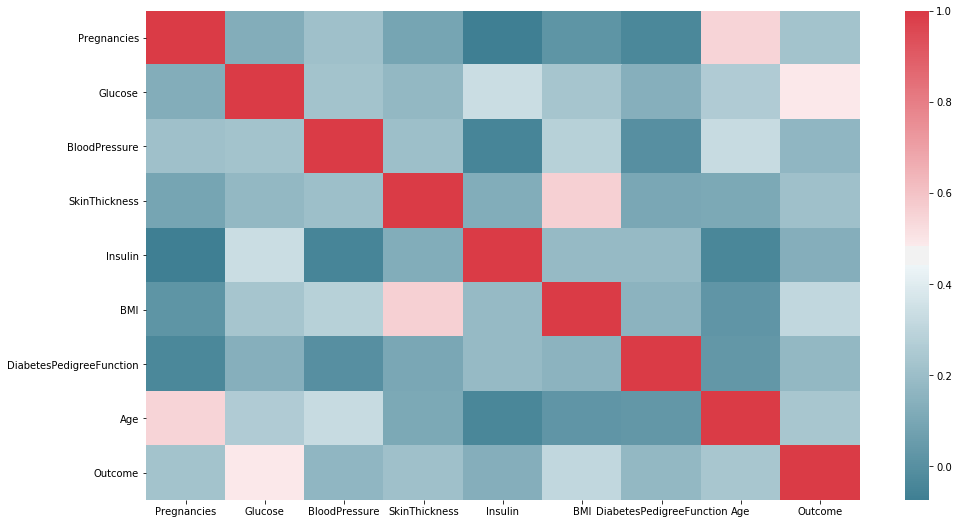

In [49]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(16,9))
sns.heatmap(corr, cmap=cmap)

Our correlation matrix shows us that a few of our features are correlated with each other. These features include: Pregnancies and Age, Glucose and Insulin, Skin Thickness and BMI, Blood Pressure and Age, and Glucose and BMI.

### Visualize Correlations

We can look at the scatter plots of these correlated features to see and understand their relationships better.

Text(0.5, 1.0, 'Glucose vs BMI')

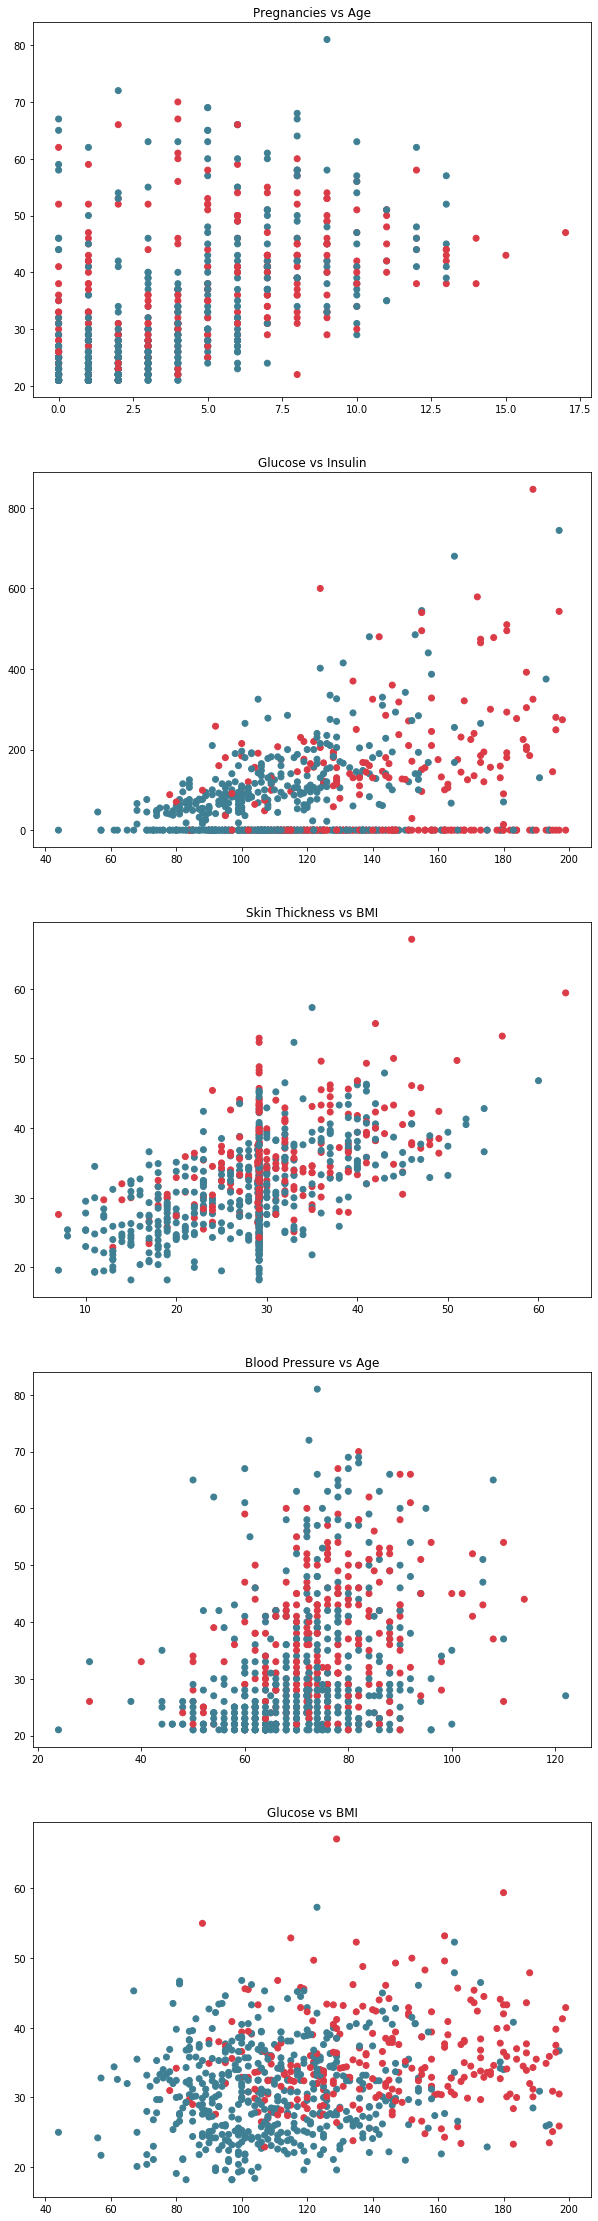

In [50]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharey=False, figsize=(10,40))
ax1.scatter(engineering_data['Pregnancies'], engineering_data['Age'], c=engineering_data['Outcome'], cmap=cmap)
ax1.set_title('Pregnancies vs Age')
ax2.scatter(engineering_data['Glucose'], engineering_data['Insulin'], c=engineering_data['Outcome'], cmap=cmap)
ax2.set_title('Glucose vs Insulin')
ax3.scatter(engineering_data['SkinThickness'], engineering_data['BMI'], c=engineering_data['Outcome'], cmap=cmap)
ax3.set_title('Skin Thickness vs BMI')
ax4.scatter(engineering_data['BloodPressure'], engineering_data['Age'], c=engineering_data['Outcome'], cmap=cmap)
ax4.set_title('Blood Pressure vs Age')
ax5.scatter(engineering_data['Glucose'], engineering_data['BMI'], c=engineering_data['Outcome'], cmap=cmap)
ax5.set_title('Glucose vs BMI')

Looking at the scatter plots of the correlated features we can see some relationships between the features and discover the following insights: 

1 - With Pregnancies and Age, there seems to be a cluster of negative cases for women who have had less than 6 pregnancies and are under the age of 40.

2 - For Glucose and Insulin, two clusters emerge. There is a cluster of negative cases for glucose under 130 and insulin under 200, and a cluster of positive cases for glucose over 130 and insulin over 200.

3 - For Skin Thickness and BMI, almost all of our positive cases come from patients with a skin thickness over 40 and a BMI over 25.

4 - For Blood Pressure and Age, there is a significant amount of negative cases in patients with blood pressure under 90 and less than 29 years old.

5 - For Glucose and BMI, there are four clusters. There is a cluster of negative cases with glucose under 160 and BMI under 30, and there is a cluster of positive cases with glucose over 160 and BMI over 30. Also, there is a cluster of negative cases with glucose under 100 and BMI under 50, and a cluster of positive cases with glucose over 100 and BMI over 50.

We can use this information to create new features and then confirm our insights with probability.

### Create New Features

#### Feature PvA

First, we will create a feature called "Pregnancies vs Age" that marks a patient as a "1" if their number of pregnancies is 6 or below and their age is 40 or below. Conversely, the feature will mark the patient as a "0" for anything else.

In [51]:
P = []
for value in engineering_data['Pregnancies']:
    if value <= 6:
        p = 1
    else:
        p = 0
    P.append(p)

A = []
for value in engineering_data['Age']:
    if value <= 40:
        a = 1
    else:
        a = 0
    A.append(a)

l = list(range(0, len(P)))
PA = []
for i in l:
    if P[i] == A[i] == 1:
        p = 1
    else:
        p = 0
    PA.append(p)
    
engineering_data['PvA'] = PA

In [52]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0


#### Feature GvI

Next, we will create a feature called "Glucose vs Insulin" that marks a patient as a "1" if their glucose level is 130 or below and their insulin level is 200 or below. Conversely, it will mark them as a "0" for anything else.

In [53]:
G = []
for value in engineering_data['Glucose']:
    if value <= 130:
        g = 1
    else:
        g = 0
    G.append(g)

I = []
for value in engineering_data['Insulin']:
    if value <= 200:
        i = 1
    else:
        i = 0
    I.append(i)

l2 = list(range(0, len(G)))
GI = []
for j in l2:
    if G[j] == I[j] == 1:
        g = 1
    else:
        g = 0
    GI.append(g)
    
engineering_data['GvI'] = GI

In [54]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA,GvI
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1


#### Feature SvBMI

Next, we will create a third feature called "Skin Thickness vs. BMI" that marks a patient as a "1" for a skin thickness that is 40 or below and a BMI that is 25 or below. Conversely, it will mark them as a "0" for anything else.

In [55]:
S = []
for value in engineering_data['SkinThickness']:
    if value <= 40:
        s = 1
    else:
        s = 0
    S.append(s)

B = []
for value in engineering_data['BMI']:
    if value <= 25:
        b = 1
    else:
        b = 0
    B.append(b)

l3 = list(range(0, len(S)))
SB = []
for j in l3:
    if S[j] == B[j] == 1:
        s = 1
    else:
        s = 0
    SB.append(s)
    
engineering_data['SvBMI'] = SB

In [56]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA,GvI,SvBMI
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1,0


#### Feature BPvA

We will now make a fourth feature called "Blood Pressure vs. Age" which will mark a patient as a "1" if their blood pressure is 90 or below and their age is less than 29. Conversely, it will mark them as "0" for anything else.

In [57]:
BP = []
for value in engineering_data['BloodPressure']:
    if value <= 90:
        bp = 1
    else:
        bp = 0
    BP.append(bp)

Age = []
for value in engineering_data['Age']:
    if value < 29:
        a = 1
    else:
        a = 0
    Age.append(a)

l4 = list(range(0, len(BP)))
BPA = []
for j in l4:
    if BP[j] == Age[j] == 1:
        bp = 1
    else:
        bp = 0
    BPA.append(bp)
    
engineering_data['BPvA'] = BPA

In [58]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA,GvI,SvBMI,BPvA
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1,0,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0,1,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1,0,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1,0,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1,0,1
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1,0,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1,0,0


#### Feature GvBMI1

The next feature we will make is "Glucose vs. BMI 1". This feature will mark a patient as a "1" if their glucose level is between 100 and 160, inclusively, and their BMI is 30 or below. Conversely, it will mark them as a "0" for anything else.

In [59]:
GL = []
for value in engineering_data['Glucose']:
    if 100 <= value <= 160:
        gl = 1
    else:
        gl = 0
    GL.append(gl)

BM = []
for value in engineering_data['BMI']:
    if value <= 30:
        bm = 1
    else:
        bm = 0
    BM.append(bm)

l5 = list(range(0, len(GL)))
GLBM = []
for j in l5:
    if GL[j] == BM[j] == 1:
        gl = 1
    else:
        gl = 0
    GLBM.append(gl)
    
engineering_data['GvBMI1'] = GLBM

In [60]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA,GvI,SvBMI,BPvA,GvBMI1
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0,0,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1,0,0,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0,1,0,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1,0,1,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1,0,0,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1,0,1,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1,0,0,1
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1,0,0,0


#### Feature GvBMI2

Lastly, we will make a feature called "Glucose vs. BMI 2". This feature will mark a patient as a "1" if their glucose level is below 100 and their BMI is 50 or below. Conversely, it will mark them as a "0" for anything else.

In [61]:
GL2 = []
for value in engineering_data['Glucose']:
    if value < 100:
        gl = 1
    else:
        gl = 0
    GL2.append(gl)

BM2 = []
for value in engineering_data['BMI']:
    if 50 >= value > 0:
        bm = 1
    else:
        bm = 0
    BM2.append(bm)

l6 = list(range(0, len(GL2)))
GLBM2 = []
for j in l6:
    if GL2[j] == BM2[j] == 1:
        gl = 1
    else:
        gl = 0
    GLBM2.append(gl)
    
engineering_data['GvBMI2'] = GLBM2

In [62]:
engineering_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PvA,GvI,SvBMI,BPvA,GvBMI1,GvBMI2
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0,0,0,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1,0,0,0,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0,1,0,0,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1,0,1,0,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1,0,0,0,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1,0,1,0,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1,0,0,1,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1,0,0,0,0


### Feature Probabilities

Now that we have created our new features, we will explore their probabilities in relation to a diagnosis of diabetes. This will help us understand the relationship of our new features to a positive diagnosis and will help confirm the impact these new features have in determining a diagnosis.

#### Probability of Diagnosis

Let's first calculate the probability of a positive and negative diagnosis in our dataset.

In [63]:
nondiabetic_cases = np.round(100*((engineering_data['Outcome'] == 0).sum()/768),decimals=2,out=None)
diabetic_cases = np.round(100*((engineering_data['Outcome'] == 1).sum()/768),decimals=2,out=None)

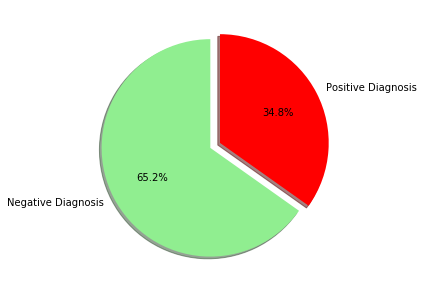

In [64]:
labels = ['Negative Diagnosis', 'Positive Diagnosis' ]
percents = [nondiabetic_cases, diabetic_cases]
explode = (0.1, 0)

fig=plt.figure(figsize=(10,5))
plt.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])

plt.show()

According to our calculations, there is a 65.2% probability of obtaining a negative diagonsis in our dataset and a 34.8% probability of obtaining a positive diagnosis in our dataset.

#### Conditional Probabilities

Now that we know the overall probabilities of diagnosis in our dataset, we can now calculate the conditional probabilities of our new features in relation to a negative and positive diagnosis.

We will start with the Pregnancies vs. Age feature.

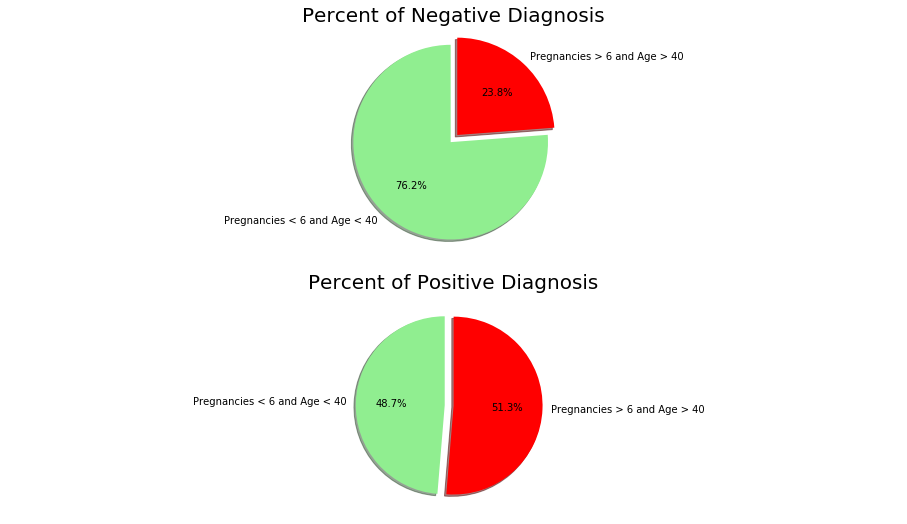

In [65]:
nondiabetic_cases = (engineering_data['Outcome'] == 0).sum()
diabetic_cases = (engineering_data['Outcome'] == 1).sum()

PvA_nocases = 100*((((engineering_data['PvA'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
PvA_cases = 100*((((engineering_data['PvA'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noPvA_nocases = 100*((((engineering_data['PvA'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noPvA_cases = 100*((((engineering_data['PvA'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
PvA_numbers = [PvA_nocases, PvA_cases, noPvA_nocases, noPvA_cases]

labels = ['Pregnancies < 6 and Age < 40', 'Pregnancies > 6 and Age > 40' ]
percents1 = [PvA_numbers[0], PvA_numbers[2]]
percents2 = [PvA_numbers[1], PvA_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

As we can see from our calculations, the probability of obtaining a negative diagnosis given the patient has less than 6 pregnancies and is less than 40 is 76%, which is a very significant number. Moreover, patients that have had over 6 pregnancies and are more than 40 account for half of our positive diagnoses. This confirms the significance of our new feature.

Let's look at the Glucose vs. Insulin feature next.

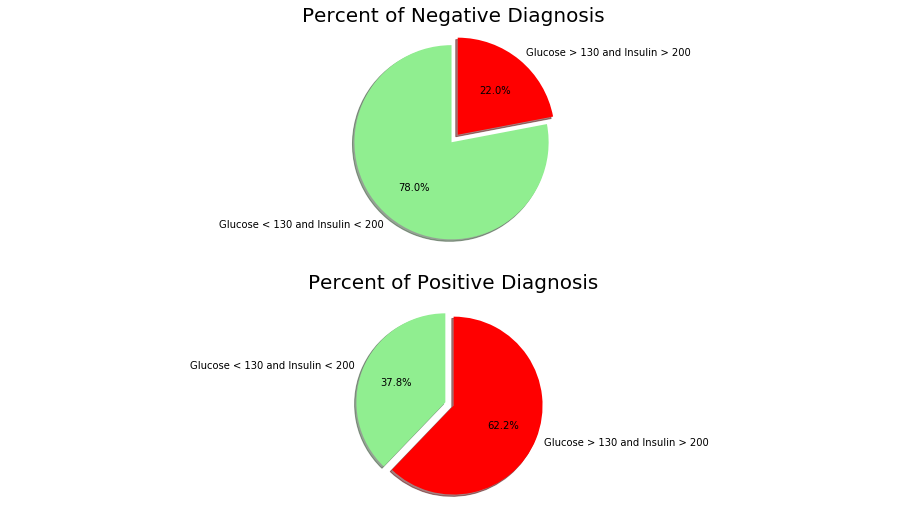

In [66]:
GvI_nocases = 100*((((engineering_data['GvI'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
GvI_cases = 100*((((engineering_data['GvI'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noGvI_nocases = 100*((((engineering_data['GvI'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noGvI_cases = 100*((((engineering_data['GvI'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
GvI_numbers = [GvI_nocases, GvI_cases, noGvI_nocases, noGvI_cases]

labels = ['Glucose < 130 and Insulin < 200', 'Glucose > 130 and Insulin > 200' ]
percents1 = [GvI_numbers[0], GvI_numbers[2]]
percents2 = [GvI_numbers[1], GvI_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

The probability of obtaining a negative diagnosis given the patient's glucose level is below 130 and their insulin is below 200 is 78%, which is a substantial percentage of negative cases. Moreover, patients that have a glucose level over 130 and an insulin level above 200 is 62%, which is also a significant number, confirming the importance of our new feature.

Let's look at the Skin Thickness vs. BMI feature next.

In [67]:
SvBMI_nocases = 100*((((engineering_data['SvBMI'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
SvBMI_cases = 100*((((engineering_data['SvBMI'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noSvBMI_nocases = 100*((((engineering_data['SvBMI'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noSvBMI_cases = 100*((((engineering_data['SvBMI'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
SvBMI_numbers = [SvBMI_nocases, SvBMI_cases, noSvBMI_nocases, noSvBMI_cases]

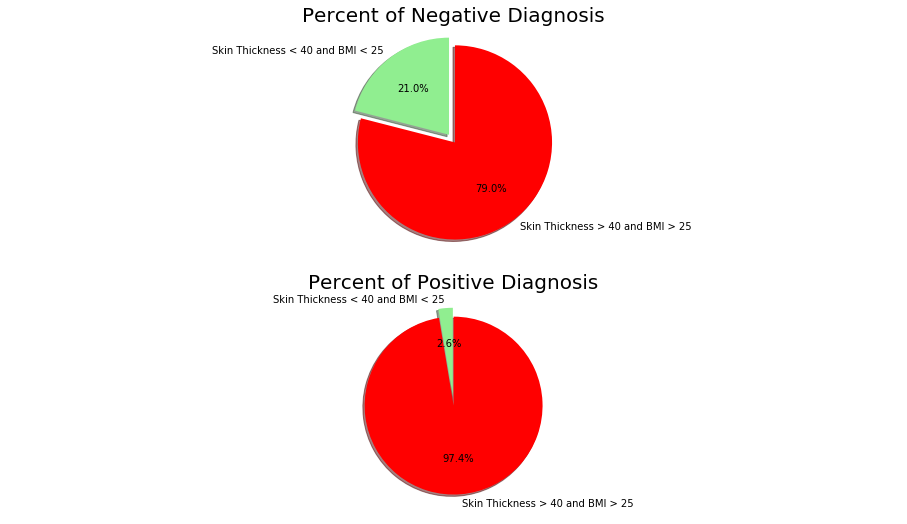

In [68]:
labels = ['Skin Thickness < 40 and BMI < 25', 'Skin Thickness > 40 and BMI > 25' ]
percents1 = [SvBMI_numbers[0], SvBMI_numbers[2]]
percents2 = [SvBMI_numbers[1], SvBMI_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

A skin thickness of more than 40 and a BMI of over 25 is present in 79% of our negative cases and 97% of our positive cases. This doesn't seem to provide a good distinction between a negative and positive diagnosis, but the fact that it is present in almost all of our positive cases makes it a good indicator of a positive diagnosis. For this reason, we will keep the feature in our model.

Next, we will look at our Blood Pressure vs. Age feature.

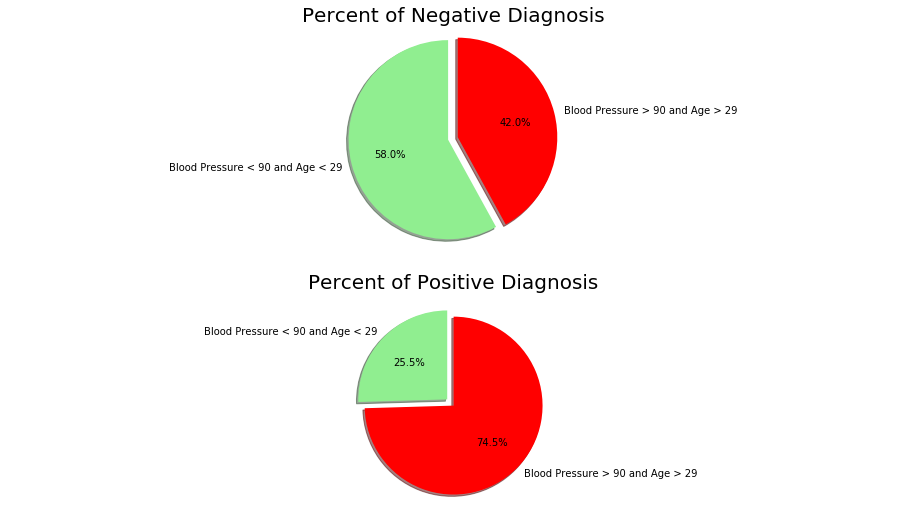

In [69]:
BPvA_nocases = 100*((((engineering_data['BPvA'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
BPvA_cases = 100*((((engineering_data['BPvA'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noBPvA_nocases = 100*((((engineering_data['BPvA'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noBPvA_cases = 100*((((engineering_data['BPvA'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
BPvA_numbers = [BPvA_nocases, BPvA_cases, noBPvA_nocases, noBPvA_cases]

labels = ['Blood Pressure < 90 and Age < 29', 'Blood Pressure > 90 and Age > 29' ]
percents1 = [BPvA_numbers[0], BPvA_numbers[2]]
percents2 = [BPvA_numbers[1], BPvA_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

A blood pressure of more than 90 and an age of more than 29 is related to only 42% of the negative cases, whereas it is related to 75% of the positive cases. These probabilities confirm a good feature.

Next, we will look at our Glucose vs. BMI 1 feature.

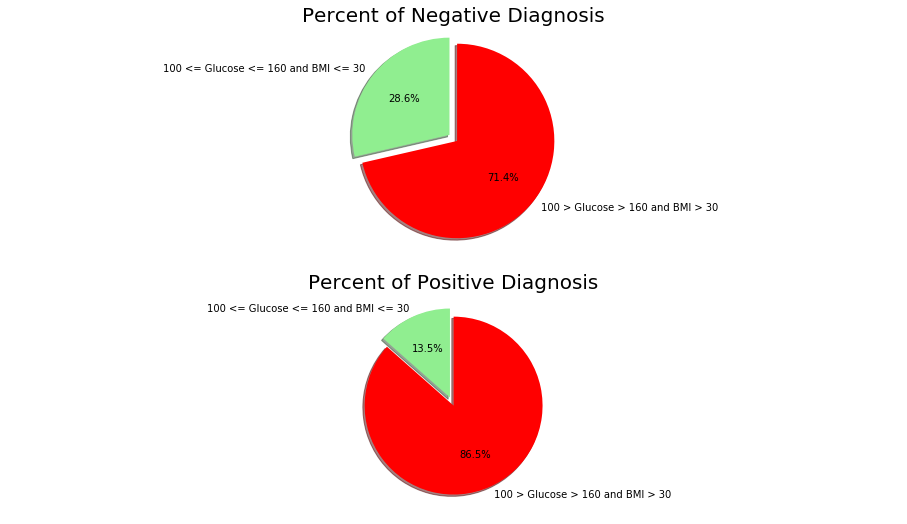

In [70]:
GvBMI1_nocases = 100*((((engineering_data['GvBMI1'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
GvBMI1_cases = 100*((((engineering_data['GvBMI1'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noGvBMI1_nocases = 100*((((engineering_data['GvBMI1'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noGvBMI1_cases = 100*((((engineering_data['GvBMI1'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
GvBMI1_numbers = [GvBMI1_nocases, GvBMI1_cases, noGvBMI1_nocases, noGvBMI1_cases]

labels = ['100 <= Glucose <= 160 and BMI <= 30', '100 > Glucose > 160 and BMI > 30' ]
percents1 = [GvBMI1_numbers[0], GvBMI1_numbers[2]]
percents2 = [GvBMI1_numbers[1], GvBMI1_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'r'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

A glucose level between 100 and 160, as well as a BMI greater than 30 accounts for 71% of negative cases. It also accounts for 87% of positive cases. This feature doesn't seem as significant as our other new features, but we will keep it for now since it is present in 87% of our positive cases.

Finally, we will look at our Glucose vs. BMI 2 feature.

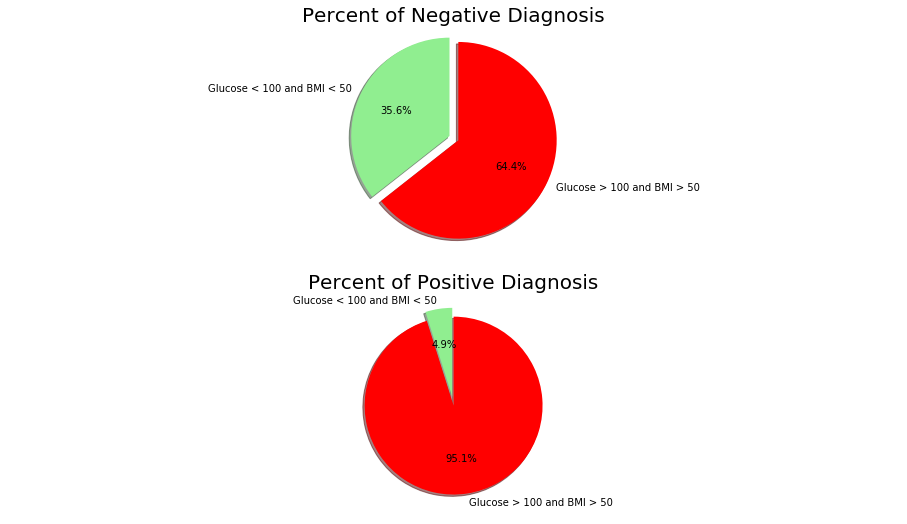

In [71]:
GvBMI2_nocases = 100*((((engineering_data['GvBMI2'] == 1) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
GvBMI2_cases = 100*((((engineering_data['GvBMI2'] == 1) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
noGvBMI2_nocases = 100*((((engineering_data['GvBMI2'] == 0) & (engineering_data['Outcome'] == 0)).sum())/nondiabetic_cases)
noGvBMI2_cases = 100*((((engineering_data['GvBMI2'] == 0) & (engineering_data['Outcome'] == 1)).sum())/diabetic_cases)
GvBMI2_numbers = [GvBMI2_nocases, GvBMI2_cases, noGvBMI2_nocases, noGvBMI2_cases]

labels = ['Glucose < 100 and BMI < 50', 'Glucose > 100 and BMI > 50' ]
percents1 = [GvBMI2_numbers[0], GvBMI2_numbers[2]]
percents2 = [GvBMI2_numbers[1], GvBMI2_numbers[3]]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(16,9))
ax1.pie(percents1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax1.axis('equal')
ax1.set_title('Percent of Negative Diagnosis', fontsize=20)
ax2.pie(percents2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightgreen', 'red'])
ax2.set_title('Percent of Positive Diagnosis', fontsize=20)

plt.show()

A glucose level of more than 100 and a BMI of over 50 is present in 64% of our negative cases and 95% of our positive cases. Just like our Skin Thickness vs. BMI feature, this doesn't seem to provide a good distinction between a negative and positive diagnosis, but the fact that it is present in almost all of our positive cases makes it a good indicator of a positive diagnosis. For this reason, we will keep the feature in our model.

Now that we have created our new features and confirmed their significance, we can now perform a second preprocessing phase in order to make our new data suitable for our algorithms.

## Second Preprocessing

### Feature Scaling

We must first standardize our new features and our original features once again.

In [72]:
new_data = engineering_data.copy()

In [73]:
new_data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'PvA', 'GvI', 'SvBMI', 'BPvA', 'GvBMI1', 'GvBMI2', 'Outcome']
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PvA,GvI,SvBMI,BPvA,GvBMI1,GvBMI2,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,0,0,0,0,0,0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1,1,0,0,0,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,0,0,1,0,0,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1,1,0,1,0,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,0,1,0,0,0,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0,1,1,0,1,0,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,1,1,0,0,1,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1,0,1,0,0,0,0


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = pd.DataFrame(sc.fit_transform(new_data.iloc[:,0:14]))

In [75]:
new_data['Outcome'] = engineering_data['Outcome']
new_data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'PvA', 'GvI', 'SvBMI', 'BPvA', 'GvBMI1', 'GvBMI2', 'Outcome']
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PvA,GvI,SvBMI,BPvA,GvBMI1,GvBMI2,Outcome
0,0.638942,0.871260,-0.033757,0.705107,-0.693559,0.166620,0.468622,1.433863,1.368451,-1.412832,-1.333786,-0.413512,-0.935578,-0.551744,1.0
1,-0.845214,-1.206984,-0.529787,-0.007405,-0.693559,-0.851610,-0.364440,-0.188095,-0.730753,0.707798,0.749745,-0.413512,-0.935578,-0.551744,0.0
2,1.232604,2.025840,-0.695130,0.010814,-0.693559,-1.331633,0.604448,-0.102729,1.368451,-1.412832,-1.333786,2.418308,-0.935578,-0.551744,1.0
3,-0.845214,-1.075032,-0.529787,-0.719916,0.122357,-0.633418,-0.919815,-1.041757,-0.730753,0.707798,0.749745,-0.413512,1.068858,-0.551744,0.0
4,-1.142045,0.508392,-2.679252,0.705107,0.764674,1.548504,5.482089,-0.017363,1.368451,0.707798,-1.333786,-0.413512,-0.935578,-0.551744,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1.826266,-0.679176,0.296930,2.248882,0.868833,0.064797,-0.907742,2.543624,-0.730753,-1.412832,0.749745,-0.413512,-0.935578,-0.551744,0.0
763,-0.548383,0.013572,-0.199100,-0.244909,-0.693559,0.632097,-0.397642,-0.529560,-0.730753,0.707798,0.749745,-0.413512,1.068858,-0.551744,0.0
764,0.342110,-0.019416,-0.033757,-0.719916,0.278596,-0.909794,-0.684385,-0.273461,-0.730753,0.707798,0.749745,-0.413512,-0.935578,1.812434,0.0
765,-0.845214,0.145524,-1.025817,0.010814,-0.693559,-0.342495,-0.370477,1.177765,1.368451,-1.412832,0.749745,-0.413512,-0.935578,-0.551744,0.0


### Encode Data

Second, we must encode our target variable again.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Outcome'] = le.fit_transform(new_data['Outcome'])

In [77]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PvA,GvI,SvBMI,BPvA,GvBMI1,GvBMI2,Outcome
0,0.638942,0.871260,-0.033757,0.705107,-0.693559,0.166620,0.468622,1.433863,1.368451,-1.412832,-1.333786,-0.413512,-0.935578,-0.551744,1
1,-0.845214,-1.206984,-0.529787,-0.007405,-0.693559,-0.851610,-0.364440,-0.188095,-0.730753,0.707798,0.749745,-0.413512,-0.935578,-0.551744,0
2,1.232604,2.025840,-0.695130,0.010814,-0.693559,-1.331633,0.604448,-0.102729,1.368451,-1.412832,-1.333786,2.418308,-0.935578,-0.551744,1
3,-0.845214,-1.075032,-0.529787,-0.719916,0.122357,-0.633418,-0.919815,-1.041757,-0.730753,0.707798,0.749745,-0.413512,1.068858,-0.551744,0
4,-1.142045,0.508392,-2.679252,0.705107,0.764674,1.548504,5.482089,-0.017363,1.368451,0.707798,-1.333786,-0.413512,-0.935578,-0.551744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1.826266,-0.679176,0.296930,2.248882,0.868833,0.064797,-0.907742,2.543624,-0.730753,-1.412832,0.749745,-0.413512,-0.935578,-0.551744,0
763,-0.548383,0.013572,-0.199100,-0.244909,-0.693559,0.632097,-0.397642,-0.529560,-0.730753,0.707798,0.749745,-0.413512,1.068858,-0.551744,0
764,0.342110,-0.019416,-0.033757,-0.719916,0.278596,-0.909794,-0.684385,-0.273461,-0.730753,0.707798,0.749745,-0.413512,-0.935578,1.812434,0
765,-0.845214,0.145524,-1.025817,0.010814,-0.693559,-0.342495,-0.370477,1.177765,1.368451,-1.412832,0.749745,-0.413512,-0.935578,-0.551744,0


Now that we have finished preprocessing our new dataset, we can employ our machine learning algorithms again, to compare our results to the results from our original dataset.

## Machine Learning (Second Phase)

### Split Dataset

We will first split the dataset into our features and targets once again.

In [78]:
features = new_data.iloc[:,0:14]
targets = pd.DataFrame(new_data.iloc[:,14])

We will also split our dataset into a training and testing dataset with an 80/20 split once again. We will also be sure to use the same random state.

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=.2, random_state=0)

We will now run our new dataset through the same three machine learning algorithms we used on the original dataset, that is Logistic Regression, Support Vector Machines, and a Naive Bayes Classifier, and then we will compare the results to our original results for each, as well as to each other.

### Logistic Regression

#### Build Model

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train, np.array(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Test Model

In [81]:
log_predictions = log_reg.predict(x_test)

#### Results

##### Confusion Matrix

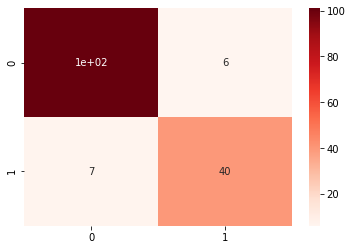

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [83]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

log_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
log_accuracy

91.55844155844156

### Support Vector Machines

#### Build Model

In [84]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Test Model

In [85]:
svm_predictions = svm.predict(x_test)

#### Results

##### Confusion Matrix

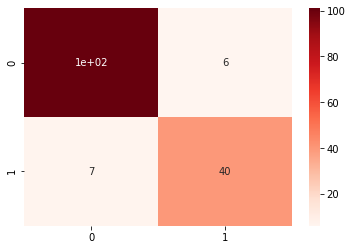

In [86]:
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [87]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

svm_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
svm_accuracy

91.55844155844156

### Naive Bayes Classifier

#### Build Model

In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Test Model

In [89]:
nb_predictions = nb.predict(x_test)

#### Results

##### Confusion Matrix

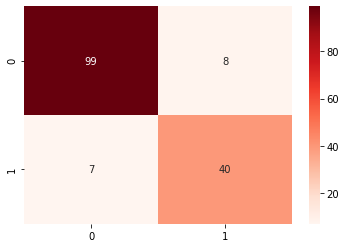

In [90]:
cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [91]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

nb_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
nb_accuracy

90.25974025974025

### Overall Interpretation

Looking at our results, we can immediately conclude that our new features have increased our accuracy for all three algorithms dramatically. Our accuracies for all three algorithms were originally between 74% and 76%, but now, our accuracies range from 90% to 92%.

Interestingly, our positive accuracy for our original data only ranged from about 50% to 60%. However, with our new features, our positive accuracy increased to 85% for all three models. This shows that our models are now better at predicting the presence of diabetes in a patient. Moreover, this validates the authenticity of our new features.

From both machine learning phases, we can see that Logistic Regression and Support Vector Machines seem to outdo a Naive Bayes Classifier on this data. Therefore, moving forward, we will disregard the Naive Bayes Classifier. Furthermore, Logistic Regression and Support Vector Machines seem to perform the same, but Support Vector Machines performed slightly better with our original data, so we will choose Support Vector Machines as our model of preference and try to fine-tune its parameters in order to achieve an even better performance.

## Support Vector Machines Parameter Tuning

We will use Gridsearch to fine-tune the parameters of our Support Vector Machine model and optimize our results.

### GridsearchCV

In [92]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

parameters = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[.01, .1, 1, 10], 'gamma':('scale', 'auto')}
svc = svm.SVC()
gs = GridSearchCV(svc, parameters)
gs.fit(x_train, y_train)

print(gs.best_params_)
gs_predictions = gs.predict(x_test)

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


According to Gridsearch, the optimal parameters for our Support Vector Machines model should be the following: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}. We will implement this into our model below.

### Optimal SVM

#### Build Model

In [93]:
from sklearn.svm import SVC
svm = SVC(C=.01, kernel = 'linear', gamma='scale', random_state = 0)
svm.fit(x_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Test Model

In [94]:
svm_predictions = svm.predict(x_test)

#### Results

##### Confusion Matrix

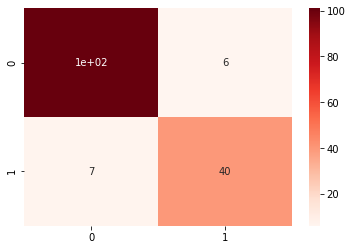

In [95]:
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, cmap='Reds')

##### Accuracy

In [96]:
zero = cm[0]
one = cm[1]
correct_zero = zero[0]
correct_one = one[1]

svm_accuracy = 100*((correct_zero+correct_one)/y_test.shape[0])
svm_accuracy

91.55844155844156

After applying Gridsearch and using the optimal parameters, our SVM model still achieves the same accuracy of 92%. 

Now, that we have our optimal model, we will perform k-Fold Cross Validation to achieve a better estimate of the model's predictive power.

### k-Fold Cross Validation

We will perform k-Fold Cross Validation with k = 10.

In [97]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = x_train, y = y_train, cv = 10)

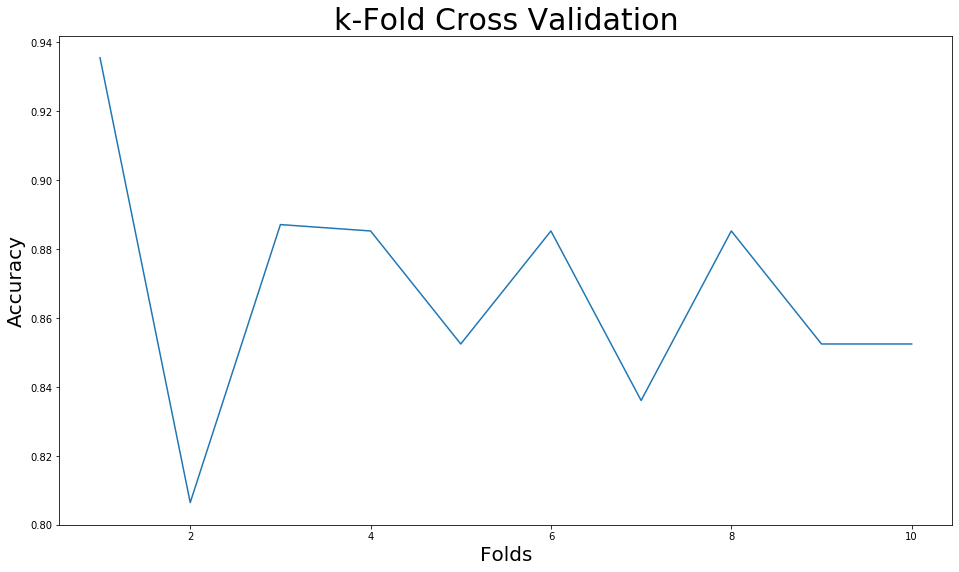

In [98]:
folds = list(range(1,11))

plt.figure(figsize=(16,9))
plt.plot(folds, accuracies)
plt.xlabel('Folds', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('k-Fold Cross Validation', fontsize=30)
plt.show()

#### k-Fold Cross Validation Accuracy

In [99]:
k_fold_accuracy = 100*(np.mean(accuracies))
k_fold_accuracy

86.78212585933368

Our mean k-Fold Cross Validation accuracy with k = 10 on our optimized Supprt Vector Machines model is 87%.

## Conclusion

Our final result for this project was an 87% prediction accuracy as to whether or not a patient has diabetes based on certain biological measurements. This came from an optimized Support Vector Machines model that was tested with k = 10 k-Fold Cross Validation. This prediction accuracy was only possible by engineering features that were a combination of original features from the dataset. This fact, in combination with our probability analysis, also helps us idenitfy the factors that are most indicative of a positive diabetes diagnosis. These factors seem to be: pregnancies over 6 in conjunction with an age over 40, a glucose level over 130 in conjunction with an insulin level over 200, blood pressure over 90 in conjunction with an age over 29, and a glucose level over 100 in conjunction with a BMI over 50.